<a href="https://www.kaggle.com/code/filipkin/starter?scriptVersionId=203351386" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import math
import missingno as msno
import matplotlib.pyplot as plt
import re


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from feature_engine.imputation import CategoricalImputer


In [2]:
df = pd.read_csv("/kaggle/input/warsaw-flat-rent-prices/otodom_complete.csv")

In [3]:
df.head()

,web-scraper-order,web-scraper-start-url,offer_url,offer_url-href,location,net_price,deposit,area,room_num,build_type,...,rest_info,offer_ID,next_pagination,next_pagination-href,add_cost,offer_last_update,second_page,second_page-href,third_page,third_page-href
0,1612265907-2487,https://www.otodom.pl/wynajem/mieszkanie/warsz...,37 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-od-zar...,"Warszawa, Włochy, ul. 1 Sierpnia",2 100 zł,Kaucja:2 100 zł,Powierzchnia:37 m²,Liczba pokoi:2,NaN,...,klimatyzacja,Nr oferty w Otodom: 61451923,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 3 dni temu,NaN,NaN,NaN,NaN
1,1612264314-1965,https://www.otodom.pl/wynajem/mieszkanie/warsz...,38 m²\n \n ...,https://www.otodom.pl/pl/oferta/2-pokoje-tanio...,"Warszawa, Mokotów, ul. Suwak 11",1 825 zł,Kaucja:3 400 zł,Powierzchnia:38 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,garaż/miejsce parkingowewindapom. użytkowe,Nr oferty w Otodom: 61405987,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:350 zł,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN
2,1612263242-1616,https://www.otodom.pl/wynajem/mieszkanie/warsz...,57 m²\n \n ...,https://www.otodom.pl/pl/oferta/wynajme-mieszk...,"Warszawa, Bielany, ul. Kwitnąca",3 300 zł,Kaucja:3 300 zł,Powierzchnia:57 m²,Liczba pokoi:3,Rodzaj zabudowy:blok,...,balkontylko dla niepalącychoddzielna kuchnia,Nr oferty w Otodom: 61375474,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,Czynsz - dodatkowo:1 zł,Data aktualizacji: 22 dni temu,NaN,NaN,NaN,NaN
3,1612265477-2346,https://www.otodom.pl/wynajem/mieszkanie/warsz...,63 m²\n \n ...,https://www.otodom.pl/pl/oferta/zielone-zacisz...,"Warszawa, Targówek, ul. św. Wincentego",2 200 zł,NaN,Powierzchnia:63 m²,Liczba pokoi:2,Rodzaj zabudowy:blok,...,NaN,Nr oferty w Otodom: 61439492,NaN,https://www.otodom.pl/wynajem/mieszkanie/warsz...,NaN,Data aktualizacji: 5 dni temu,NaN,NaN,NaN,NaN
4,1612266187-2579,https://www.otodom.pl/wynajem/mieszkanie/warsz...,65 m²\n \n ...,https://www.otodom.pl/pl/oferta/eleganckie-mie...,"Warszawa, Ochota, Stara Ochota, ul. Juliana Ur...",3 000 zł,Kaucja:3 000 zł,Powierzchnia:65 m²,Liczba pokoi:3,Rodzaj zabudowy:kamienica,...,NaN,Nr oferty w Otodom: 61455072,NaN,NaN,NaN,Data aktualizacji: 2 dni temu,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'offer_url',
       'offer_url-href', 'location', 'net_price', 'deposit', 'area',
       'room_num', 'build_type', 'floor', 'total_floor', 'build_mat',
       'windows', 'heating', 'year_built', 'status', 'agd', 'security',
       'add_info', 'rest_info', 'offer_ID', 'next_pagination',
       'next_pagination-href', 'add_cost', 'offer_last_update', 'second_page',
       'second_page-href', 'third_page', 'third_page-href'],
      dtype='object')

In [5]:
df.describe()

,next_pagination,second_page,third_page
count,0.0,137.0,41.0
mean,NaN,2.0,3.0
std,NaN,0.0,0.0
min,NaN,2.0,3.0
25%,NaN,2.0,3.0
50%,NaN,2.0,3.0
75%,NaN,2.0,3.0
max,NaN,2.0,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   web-scraper-order      3482 non-null   object 
 1   web-scraper-start-url  3482 non-null   object 
 2   offer_url              3482 non-null   object 
 3   offer_url-href         3482 non-null   object 
 4   location               3481 non-null   object 
 5   net_price              3481 non-null   object 
 6   deposit                3146 non-null   object 
 7   area                   3481 non-null   object 
 8   room_num               3481 non-null   object 
 9   build_type             3339 non-null   object 
 10  floor                  3401 non-null   object 
 11  total_floor            3045 non-null   object 
 12  build_mat              2239 non-null   object 
 13  windows                2899 non-null   object 
 14  heating                2998 non-null   object 
 15  year

In [7]:
df.shape

(3482, 30)

In [8]:
df.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
offer_url                   0
offer_url-href              0
location                    1
net_price                   1
deposit                   336
area                        1
room_num                    1
build_type                143
floor                      81
total_floor               437
build_mat                1243
windows                   583
heating                   484
year_built               1014
status                    291
agd                        47
security                   90
add_info                  292
rest_info                1470
offer_ID                    1
next_pagination          3482
next_pagination-href     1014
add_cost                 1567
offer_last_update           1
second_page              3345
second_page-href         3345
third_page               3441
third_page-href          3441
dtype: int64

In [9]:
df.drop(["web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","third_page-href","web-scraper-order","web-scraper-start-url","offer_url","offer_url-href","next_pagination","next_pagination-href","offer_last_update","second_page","second_page-href","third_page","third_page-href","offer_ID"], axis = 1, inplace = True)

In [10]:
categorical = [var for var in df.columns if df[var].dtype == 'O']

# make a list of numerical variables
numerical = [var for var in df.columns if df[var].dtype != 'O']

# make a list of discrete variables
discrete = [ var for var in numerical if len(df[var].unique()) < 20]

In [11]:
categorical


['location',
 'net_price',
 'deposit',
 'area',
 'room_num',
 'build_type',
 'floor',
 'total_floor',
 'build_mat',
 'windows',
 'heating',
 'year_built',
 'status',
 'agd',
 'security',
 'add_info',
 'rest_info',
 'add_cost']

In [12]:
columns_to_clean = ["deposit","room_num","area","total_floor","floor","net_price","year_built","add_cost"]
df[columns_to_clean] = df[columns_to_clean].apply(lambda col: col.str.replace(r'\D', '', regex=True))

In [13]:
df['location'] = df['location'].str.split(',').str[1].str.strip()

In [14]:
columns_to_clean1 = ["build_type","status","heating","windows","build_mat"]
df[columns_to_clean1] = df[columns_to_clean1].astype(str)
for col in columns_to_clean1:
    df[col] = df[col].str.split(pat=":", expand=True)[1]  # Keep only the second part

In [15]:
df

,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,heating,year_built,status,agd,security,add_info,rest_info,add_cost
0,Włochy,2100,2100,37,2,None,,4,None,plastikowe,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,domofon / wideofon,internet,klimatyzacja,NaN
1,Mokotów,1825,3400,38,2,blok,,NaN,pustak,plastikowe,miejskie,2020,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,domofon / wideofonmonitoring / ochrona,telewizja kablowainternet,garaż/miejsce parkingowewindapom. użytkowe,350
2,Bielany,3300,3300,57,3,blok,,15,wielka płyta,drewniane,miejskie,1984,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamaniowedomofon / wideofonm...,telewizja kablowainternet,balkontylko dla niepalącychoddzielna kuchnia,1
3,Targówek,2200,NaN,63,2,blok,4,5,cegła,drewniane,miejskie,2005,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,balkon,NaN,NaN
4,Ochota,3000,3000,65,3,kamienica,3,4,cegła,plastikowe,miejskie,1938,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkapralka,drzwi / okna antywłamanioweteren zamkniętydomo...,piwnicawindatylko dla niepalącychoddzielna kuc...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,Praga-Południe,2000,2500,45,1,apartamentowiec,3,7,None,None,None,NaN,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,monitoring / ochrona,telewizja kablowainternettelefon,winda,350
3478,Wilanów,3300,3000,50,2,blok,1,2,cegła,plastikowe,miejskie,2006,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,drzwi / okna antywłamanioweteren zamkniętydomo...,telewizja kablowainternet,balkonpiwnicagaraż/miejsce parkingowepom. użyt...,NaN
3479,Praga-Południe,2500,2500,4666,2,apartamentowiec,5,5,cegła,plastikowe,miejskie,2015,do zamieszkania,zmywarkalodówkameblepiekarnikkuchenkatelewizor...,teren zamkniętydomofon / wideofonmonitoring / ...,telewizja kablowainternettelefon,balkongaraż/miejsce parkingowewindatylko dla n...,NaN
3480,Praga-Północ,1300,1700,23,1,kamienica,,4,cegła,drewniane,kotłownia,1938,do zamieszkania,lodówkameblepralka,drzwi / okna antywłamaniowe,internet,tylko dla niepalących,270


In [16]:
df["location"].value_counts()

location
Mokotów             647
Wola                512
Śródmieście         347
Praga-Południe      240
Ursynów             205
Ochota              201
Bielany             166
Białołęka           155
Bemowo              155
Praga-Północ        135
Wilanów             125
Targówek            116
Żoliborz            105
Ursus                97
Włochy               77
Centrum              63
mazowieckie          44
Wawer                42
Warszawa             19
Rembertów            14
Wesoła               14
Metro Wilanowska      2
Name: count, dtype: int64

In [17]:
# Define the list of columns to check
columns_to_check = ['add_info', 'rest_info', 'security', 'agd']

# Example list of common words to search for and remove
common_words = ['internet', 'balkon', 'piwnica',"telewizja kablowa","winda", "garaż/miejsce parkingowe","taras","ogródek","winda","telefon","oddzielna kuchnia",
                
                "pom. użytkowe","klimatyzacja","dwupoziomowe","tylko dla niepalących","wynajmę również studentom","zmywarka","lodówka","pralka","kuchenka","meble","piekarnik","telewizor"
               ,"drzwi / okna antywłamaniowe","monitoring","teren zamknięty","ochrona","domofon / wideofon", "system alarmowy", "rolety antywłamaniowe", "system alarmowy / rolety antywłamaniowe"
               ]  # Add more words as needed

# Step 1: Loop through each word in the common words list
for word in common_words:
    # Create a new flag column for each word (e.g., is_poddasze, is_internet, etc.)
    flag_column = f'is_{word}'
    df[flag_column] = df[columns_to_check].apply(lambda row: any(word in str(x).lower() for x in row), axis=1).astype(int)
    
    # Step 2: Remove the word from the specified columns
    for col in columns_to_check:
        df[col] = df[col].apply(lambda x: str(x).replace(word, '').strip() if pd.notna(x) else x)

# Display the updated dataframe
df.head()


,location,net_price,deposit,area,room_num,build_type,floor,total_floor,build_mat,windows,...,is_piekarnik,is_telewizor,is_drzwi / okna antywłamaniowe,is_monitoring,is_teren zamknięty,is_ochrona,is_domofon / wideofon,is_system alarmowy,is_rolety antywłamaniowe,is_system alarmowy / rolety antywłamaniowe
0,Włochy,2100,2100,37,2,None,,4,None,plastikowe,...,1,1,0,0,0,0,1,0,0,0
1,Mokotów,1825,3400,38,2,blok,,NaN,pustak,plastikowe,...,1,0,0,1,0,1,1,0,0,0
2,Bielany,3300,3300,57,3,blok,,15,wielka płyta,drewniane,...,1,1,1,1,0,1,1,0,0,0
3,Targówek,2200,NaN,63,2,blok,4,5,cegła,drewniane,...,1,1,0,1,1,1,1,0,0,0
4,Ochota,3000,3000,65,3,kamienica,3,4,cegła,plastikowe,...,1,0,1,0,1,0,1,0,0,0


In [18]:
df["add_info"].unique()

array(['', nan], dtype=object)

In [19]:
df["rest_info"].unique()


array(['', nan], dtype=object)

In [20]:
df["security"].unique()

array(['', '/', nan], dtype=object)

In [21]:
df["agd"].unique()

array(['', nan, '/'], dtype=object)

In [22]:
df.drop(["agd","security","rest_info","add_info"], axis = 1, inplace = True)

In [23]:
columns_to_clean = [df.columns]
for col in columns_to_clean:
    df[col] = df[col].replace(['', '/'], np.nan)

In [24]:
columns_to_convert = ["net_price","deposit","area","room_num","total_floor","floor"]
df[columns_to_convert] = df[columns_to_convert].fillna(0).astype(int)
df[columns_to_convert] = df[columns_to_convert].replace(0, pd.NA)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3482 entries, 0 to 3481
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   location                                    3481 non-null   object
 1   net_price                                   3481 non-null   object
 2   deposit                                     3146 non-null   object
 3   area                                        3481 non-null   object
 4   room_num                                    3481 non-null   object
 5   build_type                                  3339 non-null   object
 6   floor                                       3060 non-null   object
 7   total_floor                                 3045 non-null   object
 8   build_mat                                   2239 non-null   object
 9   windows                                     2899 non-null   object
 10  heating                 

In [26]:
catimp = CategoricalImputer(imputation_method="frequent")
imputed_Cat_df = catimp.fit_transform(df[['location', 'build_type',"build_mat","windows","heating","status"]])


In [27]:
imputed_Cat_df.isna().sum()

location      0
build_type    0
build_mat     0
windows       0
heating       0
status        0
dtype: int64

In [28]:

imputed_Cat_df.index = df.index


df_dropped = df.drop(columns=['location', 'build_type', 'build_mat', 'windows', 'heating', 'status'])


final_df = pd.concat([df_dropped, imputed_Cat_df], axis=1)


final_df.head()


,net_price,deposit,area,room_num,floor,total_floor,year_built,add_cost,is_internet,is_balkon,...,is_domofon / wideofon,is_system alarmowy,is_rolety antywłamaniowe,is_system alarmowy / rolety antywłamaniowe,location,build_type,build_mat,windows,heating,status
0,2100,2100,37,2,<NA>,4,NaN,NaN,1,0,...,1,0,0,0,Włochy,blok,cegła,plastikowe,miejskie,do zamieszkania
1,1825,3400,38,2,<NA>,<NA>,2020,350,1,0,...,1,0,0,0,Mokotów,blok,pustak,plastikowe,miejskie,do zamieszkania
2,3300,3300,57,3,<NA>,15,1984,1,1,1,...,1,0,0,0,Bielany,blok,wielka płyta,drewniane,miejskie,do zamieszkania
3,2200,<NA>,63,2,4,5,2005,NaN,0,1,...,1,0,0,0,Targówek,blok,cegła,drewniane,miejskie,do zamieszkania
4,3000,3000,65,3,3,4,1938,NaN,0,0,...,1,0,0,0,Ochota,kamienica,cegła,plastikowe,miejskie,do zamieszkania


In [29]:
final_df.isna().sum()

net_price                                        1
deposit                                        336
area                                             1
room_num                                         1
floor                                          422
total_floor                                    437
year_built                                    1014
add_cost                                      1567
is_internet                                      0
is_balkon                                        0
is_piwnica                                       0
is_telewizja kablowa                             0
is_winda                                         0
is_garaż/miejsce parkingowe                      0
is_taras                                         0
is_ogródek                                       0
is_telefon                                       0
is_oddzielna kuchnia                             0
is_pom. użytkowe                                 0
is_klimatyzacja                

<Axes: >

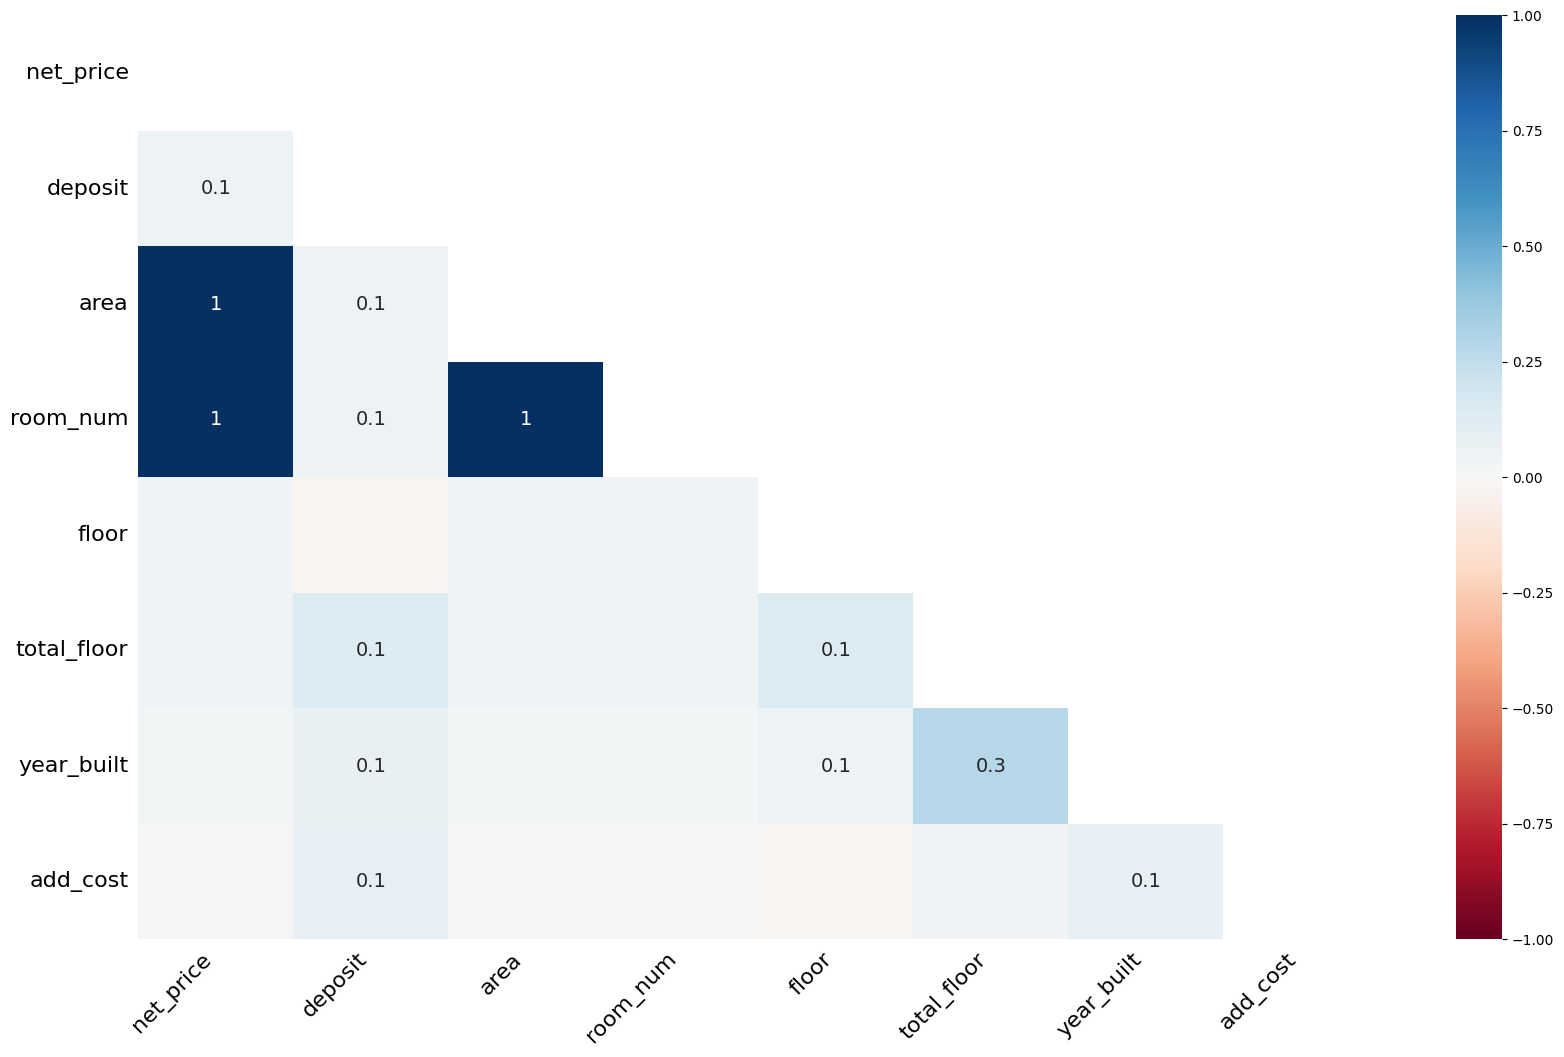

In [30]:
msno.heatmap(final_df)

In [31]:
imputer = KNNImputer(n_neighbors=3)

In [32]:
#final_df_imputed = pd.DataFrame(imputer.fit_transform(final_df), columns = final_df.columns)

In [33]:
#final_df_imputed.head(10)

In [34]:
#round(final_df_imputed["floor"], 0)

In [35]:
#round(final_df_imputed["year_built"], 0)

In [36]:
#sns.histplot(data = final_df_imputed, x = "deposit")

In [37]:
#sns.histplot(data = final_df_imputed, x = "net_price")
#plt.ylim(0, 500)
#plt.xlim(0,30000)

In [38]:
#count_price = final_df_imputed[final_df_imputed['net_price'] > 5000].shape[0]


In [39]:
#count_price

In [40]:
'''
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(df[['location', 'build_type',"build_mat","windows","heating","status"]])


encoded_columns = encoder.get_feature_names_out(['location', 'build_type', 'build_mat', 'windows', 'heating', 'status'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)


encoded_df.index = df.index


df_dropped = df.drop(columns=['location', 'build_type', 'build_mat', 'windows', 'heating', 'status'])


final_df = pd.concat([df_dropped, encoded_df], axis=1)

a
final_df.head()
'''

'\nencoder = OneHotEncoder(sparse_output=False)\n\nencoded_data = encoder.fit_transform(df[[\'location\', \'build_type\',"build_mat","windows","heating","status"]])\n\n\nencoded_columns = encoder.get_feature_names_out([\'location\', \'build_type\', \'build_mat\', \'windows\', \'heating\', \'status\'])\nencoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)\n\n\nencoded_df.index = df.index\n\n\ndf_dropped = df.drop(columns=[\'location\', \'build_type\', \'build_mat\', \'windows\', \'heating\', \'status\'])\n\n\nfinal_df = pd.concat([df_dropped, encoded_df], axis=1)\n\na\nfinal_df.head()\n'

In [41]:
#count_price_df = final_df_imputed[final_df_imputed['net_price'] > 5000]
#count_price

In [42]:
#sns.histplot(data = final_df_imputed, x = "area", stat = "count")
#plt.ylim(0, 700)
#plt.xlim(0,5000)

In [43]:
#count = final_df_imputed[final_df_imputed['area'] > 1000].shape[0]


In [44]:
#count

In [45]:
#count_both = final_df_imputed[(final_df_imputed['area'] > 1000) & (final_df_imputed["net_price"] > 5000)].shape[0]


In [46]:
#count_both